# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [ ]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [84]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 50
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
import random


%matplotlib inline

In [8]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



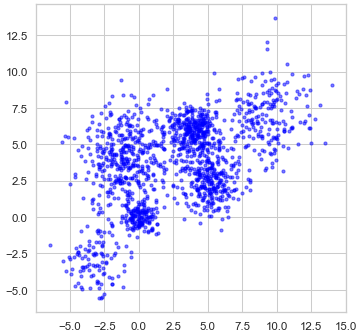

In [69]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

In [60]:
'''
Multi_blob_Data info: 
- an array of size 1450 data points in 6 clusters with centers: (-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)
- due to data being skewed: Normalize using MinMaxScaler
'''
df_blob = pd.DataFrame(Multi_blob_Data)
print(df_blob.skew()) # 0 skewness: symmetrical distribution of values
# negative skewness: left-skewed, positive skewness: right-skewed
# df_blob.rename(columns={"0": "x","1":"y"}, inplace=True)
df_blob.describe()

0    0.218448
1   -0.528185
dtype: float64


,0,1
count,1450.000000,1450.000000
mean,2.654231,3.675628
std,3.953782,3.048856
min,-6.405669,-5.583840
25%,-0.603349,1.752051
50%,3.204199,4.036196
75%,5.128255,5.978841
max,14.013461,13.674604


In [44]:
scaler = MinMaxScaler()
df_blob_norm = pd.DataFrame(scaler.fit_transform(df_blob.values), columns=df_blob.columns, index=df_blob.index)
df_blob_norm.describe()

,0,1
count,1450.000000,1450.000000
mean,0.443697,0.480800
std,0.193631,0.158313
min,0.000000,0.000000
25%,0.284161,0.380918
50%,0.470631,0.499523
75%,0.564859,0.600395
max,1.000000,1.000000


In [ ]:
# Draft

# Using KMeans with k = 3
km = KMeans(n_clusters=3)
df_blob_norm.columns = df_blob_norm.columns.astype(str)
y_predicted = km.fit_predict(df_blob_norm) # an array with each point's cluster, either 0, 1 or 2
df_blob_norm['cluster']=y_predicted
df_blob_norm.head()

def plot_kmeans(df, k):
    # no_of_colors=5
    # color=["#"+''.join([random.choice('0123456789ABCDEF') for i in range(6)])
    #    for j in range(no_of_colors)]
    colour = ['black', 'blue','green','orange', 'violet', 'brown', 'pink', 'gray','yellow', 'purple','white']
    for i in range(k):
        plt.scatter(df.columns[0],df.columns[1],color=colour[i])     
        plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color=colour[i],marker='*',label='centroid')
        plt.legend()
    plt.show()
 #     df_i = df[df_blob_norm.cluster==i]

 def plot_kmeans(df, k):
    rand_color = (randrange(255), randrange(255), randrange(255))
    for i in range(k):
        df_i = df[df_blob_norm.cluster==i]
        plt.scatter(df_i.columns[0],df_i.columns[1],color=rand_color)     
        plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color=rand_color,marker='*',label='centroid')
        plt.legend()


df1 = df_blob_norm[df_blob_norm.cluster==0]
df2 = df_blob_norm[df_blob_norm.cluster==1]
df3 = df_blob_norm[df_blob_norm.cluster==2]
plt.scatter(df1['0'],df1['1'],color='green')
plt.scatter(df2['0'],df2['1'],color='red')
plt.scatter(df3['0'],df3['1'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

[20.549546913470422]


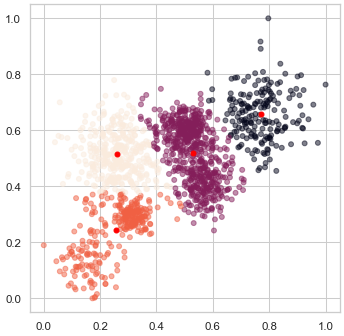

1
2
3
4
5
6
7
8


In [107]:
# Method for KMeans clustering and plotting 

k_values = range(1,9) # 1..8
distortion_fxn = []
def kmeans_clustering(df,k): # works
    km = KMeans(n_clusters=k)
    df.columns = df.columns.astype(str)
    y_predicted = km.fit_predict(df_blob_norm) # an array with each point's cluster, either 0, 1 or 2
    distortion_fxn.append(km.inertia_)
    print(distortion_fxn)
    df['cluster']=y_predicted
    plt.scatter(df['0'], df['1'], c= km.labels_.astype(float), s=50, alpha=0.5)
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', s=50)
    plt.show()
    # print(df.head())

kmeans_clustering(df_blob_norm,4)
for i in k_values:
    print(i)
    
# for i in k_values:
#     kmeans_clustering(df_blob_norm,i)
#     plt.xlabel('K')
#     plt.ylabel('Distortion Function')
#     plt.plot(i,distortion_fxn)
#     plt.show()



### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [9]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']

['setosa', 'versicolor', 'virginica']

In [17]:
type(iris_data) #sklearn.utils._bunch.Bunch

# Must convert the datatset to a DataFrame  
df_iris = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
iris_data['target'] = pd.Series(iris_data.target)

# Now normal DataFrame methods work, such as head, info, etc...
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
df_iris.info()

'''
150 data points (0 indexing), with 4 features each
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 